In [1]:
# Following George Hotz MNIST classifier from numpy scratch!

In [2]:
%pylab inline
import numpy as np
from tqdm import trange

Populating the interactive namespace from numpy and matplotlib


In [3]:
def fetch(url):
    import requests, gzip, os, hashlib, numpy
    fp = os.path.join("/tmp", hashlib.md5(url.encode('utf-8')).hexdigest())
    if not os.path.isfile(fp):
        with open(fp, "rb") as f:
            data = f.read()
    else:
        with open(fp, "wb") as f:
            data = requests.get(url).content
            f.write(data)
    return numpy.frombuffer(gzip.decompress(data), dtype=np.uint8).copy()

In [4]:
X_train = fetch("http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz")[0x10:].reshape(-1, 28, 28)
Y_train = fetch("http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz")[8:]
X_test = fetch("http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz")[0x10:].reshape(-1, 28, 28)
Y_test = fetch("http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz")[8:]

In [56]:
# Model
import torch
import torch.nn as nn
class BobNet(torch.nn.Module):
    def __init__(self):
        super(BobNet, self).__init__()
        self.l1 = nn.Linear(784, 128, bias=False)
        self.act = nn.ReLU()
        self.l2 = nn.Linear(128, 10, bias=False)
    def forward(self, x):
        x = self.l1(x)
        x = self.act(x)
        x = self.l2(x)
        return x

loss 0.23 accuracy 0.94: 100%|██████████| 1000/1000 [00:05<00:00, 186.39it/s]


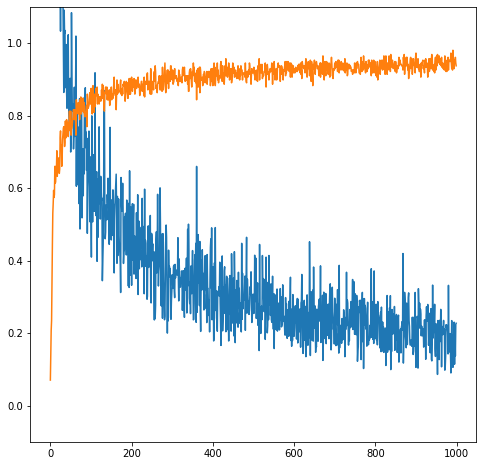

In [147]:
# Training
model = BobNet()
bs = 256
loss_function = nn.CrossEntropyLoss()
optim = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0)
losses, accuracies = [], []
for i in (t := trange(1000)):
    sample = np.random.randint(0, X_train.shape[0], size=(bs))
    X = torch.tensor(X_train[sample].reshape((-1, 28*28))).float()
    Y = torch.tensor(Y_train[sample]).long()
    model.zero_grad()
    out = model(X)
    cat = torch.argmax(out, dim=1)
    accuracy = (cat == Y).float().mean()
    loss = loss_function(out, Y)
    loss.backward()
    optim.step()
    loss, accuracy = loss.item(), accuracy.item()
    losses.append(loss)
    accuracies.append(accuracy)
    t.set_description("loss %.2f accuracy %.2f" % (loss, accuracy))

plt.ylim(-0.1, 1.1)
plot(losses)
plot(accuracies)


In [96]:
# Evaluation 
Y_test_preds = torch.argmax(model(torch.tensor(X_test.reshape((-1, 28 * 28))).float()), dim =1).numpy()
(Y_testdddd == Y_test_preds).mean()

0.9328

In [97]:
# init the network
l1 = np.zeros((784, 128), dtype=np.float32)
l2 = np.zeros((128, 10), dtype=np.float32)
l1.dtype, l2.dtype

(dtype('float32'), dtype('float32'))

In [140]:
# Copy weights from pytorch
l1[:] = model.l1.weight.detach().numpy().T
l2[:] = model.l2.weight.detach().numpy().T

In [141]:
# numpy forward pass
def forward(x):
    x = x.dot(l1)
    x = np.maximum(x, 0)
    x = x.dot(l2)
    
    return x
Y_test_preds_out = forward(X_test.reshape((-1, 28*28)))
Y_test_preds = np.argmax(Y_test_preds_out, axis = 1)
(Y_test == Y_test_preds).mean()

0.9328

In [142]:
# training in numpy 
samp = 0
ret = -Y_test_preds_out[range(Y_test_preds_out.shape[samp]), Y_test] + np.log(np.exp(Y_test_preds_out[samp]).sum())

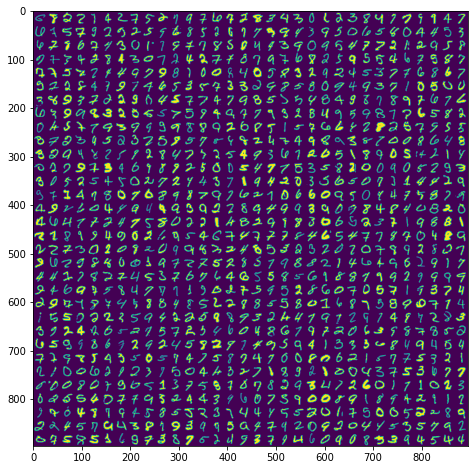

In [146]:
G = 32
grid = sorted(list(zip(ret, range(ret.shape[0]))), reverse=True)[0:G*G]
X_bad = X_test[[x[1] for x in grid]]
figsize(8,8)
imshow(np.concatenate(X_bad.reshape((G, 28*G, 28)), axis=1))

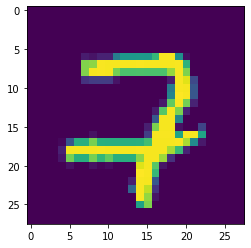

In [119]:
range(ret.shape[0])

range(0, 10000)